In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [81]:
# Load the dataset with the appropriate encoding
org_data = pd.read_csv('C:/Users/Dell/Desktop/Croprediction Capstone/Croprediction Capstone/Crop_recommendation.csv',encoding='latin-1')
org_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Soil
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,clayloams
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,clay loams
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,clay loams
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,clay loams
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,clay loams


In [82]:
df = org_data.copy()
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Soil
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,clayloams
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,clay loams
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,clay loams
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,clay loams
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,clay loams


In [83]:
df.shape

(2200, 9)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Soil         2200 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 154.8+ KB


In [85]:
df.isnull().sum()
# no missing values in the dataset

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
Soil           0
dtype: int64

In [86]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [87]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


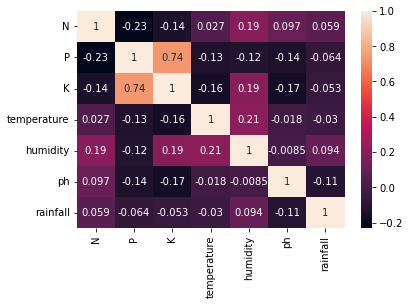

In [88]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [89]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [90]:
df['label'].nunique()

22

In [91]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [92]:
df.groupby('label')[df.columns[:-2]].mean()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


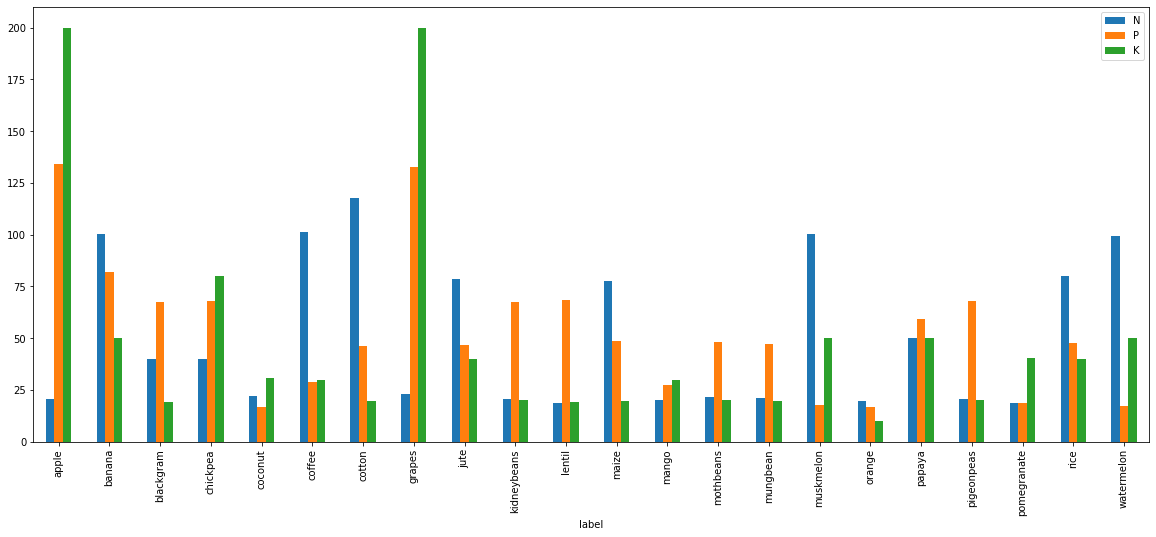

In [93]:
df.iloc[:,[0,1,2,7]].groupby('label')[df.columns[:3]].mean().plot(kind='bar',figsize=(20,8))
plt.show()

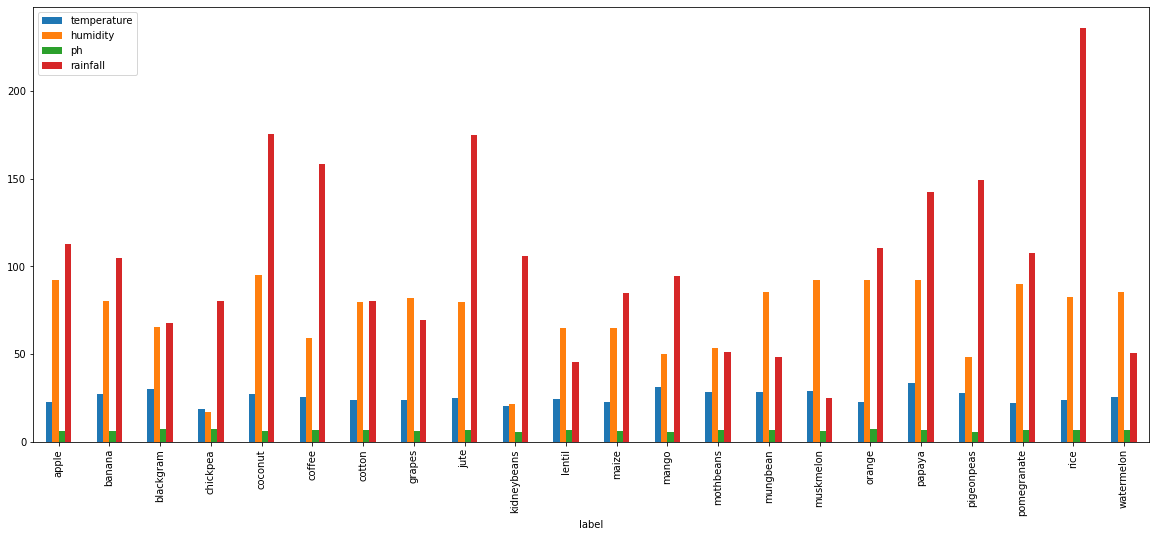

In [94]:
df.groupby('label')[df.columns[3:7]].mean().plot(kind='bar',figsize=(20,8))
plt.show()

In [95]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'Soil'],
      dtype='object')

### Nitrogen

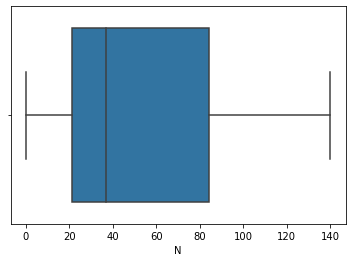

In [96]:
sns.boxplot(df['N'])
plt.show()

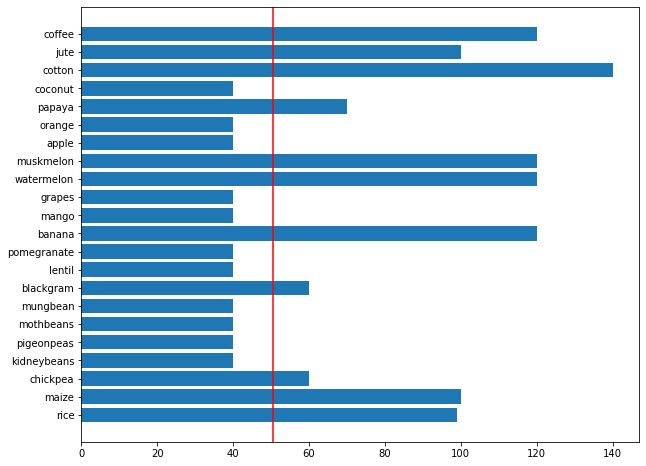

In [97]:
plt.figure(figsize=(10,8))
plt.barh(df['label'],df['N'])
plt.axvline(df['N'].mean(),c='r')
plt.show()

### Phosphorous

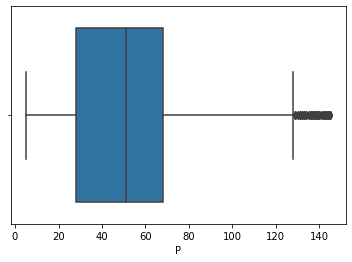

In [98]:
sns.boxplot(df['P'])
plt.show()

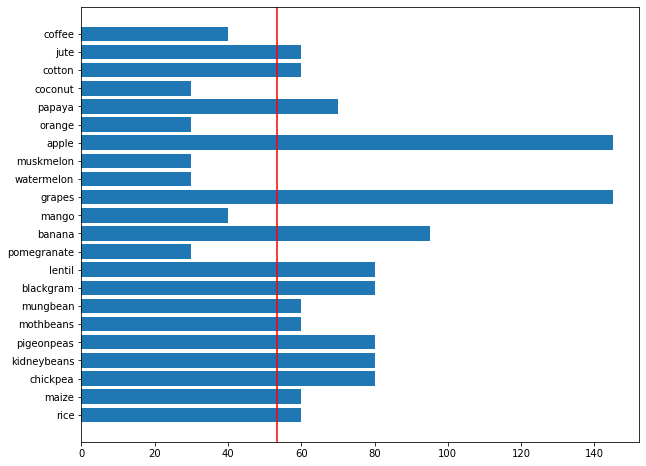

In [99]:
plt.figure(figsize=(10,8))
plt.barh(df['label'],df['P'])
plt.axvline(df['P'].mean(),c='r')
plt.show()

### Potassium

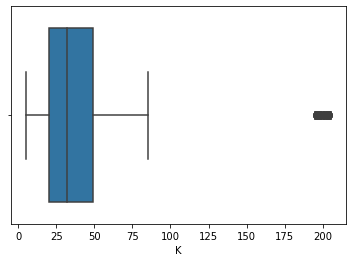

In [100]:
sns.boxplot(df['K'])
plt.show()

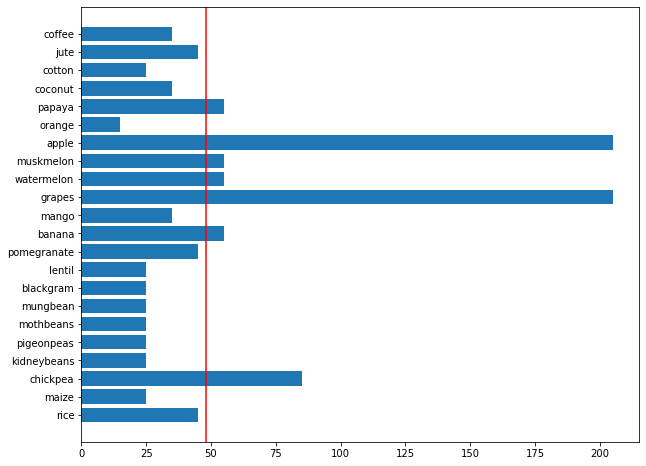

In [101]:
plt.figure(figsize=(10,8))
plt.barh(df['label'],df['K'])
plt.axvline(df['K'].mean(),c='r')
plt.show()

### Temperature

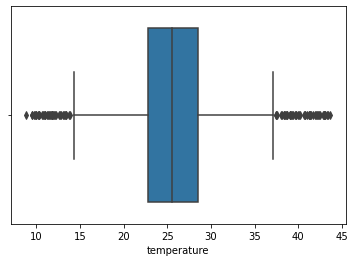

In [102]:
sns.boxplot(df['temperature'])
plt.show()

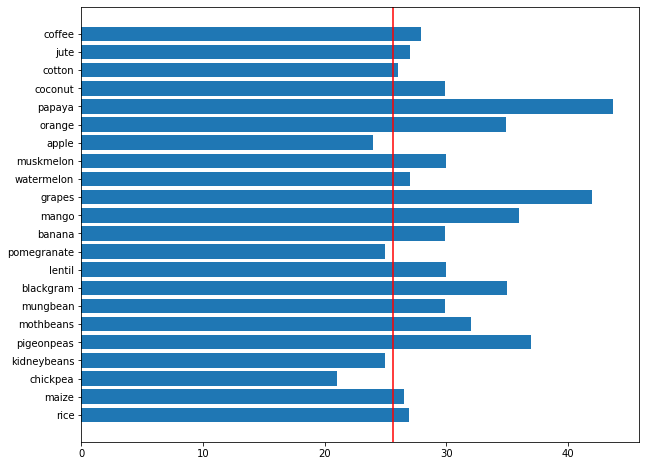

In [103]:
plt.figure(figsize=(10,8))
plt.barh(df['label'],df['temperature'])
plt.axvline(df['temperature'].mean(),c='r')
plt.show()

### Humidity

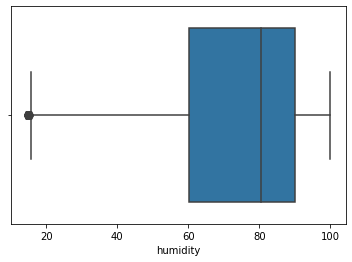

In [104]:
sns.boxplot(df['humidity'])
plt.show()

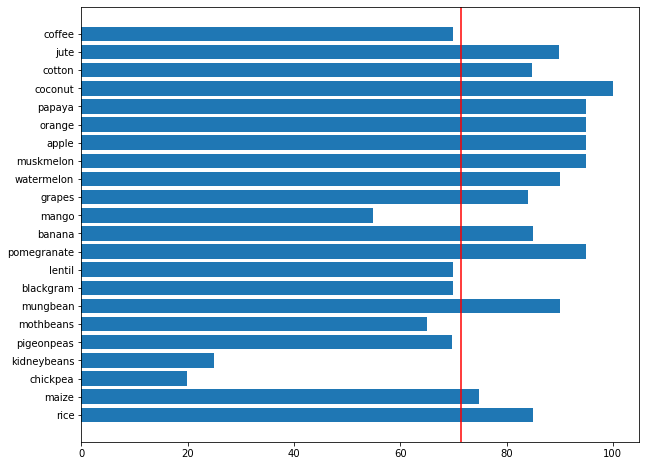

In [105]:
plt.figure(figsize=(10,8))
plt.barh(df['label'],df['humidity'])
plt.axvline(df['humidity'].mean(),c='r')
plt.show()

### PH

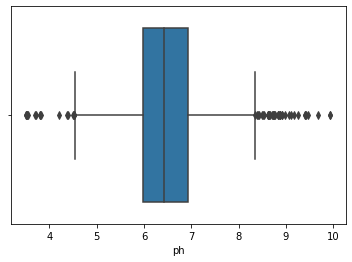

In [106]:
sns.boxplot(df['ph'])
plt.show()

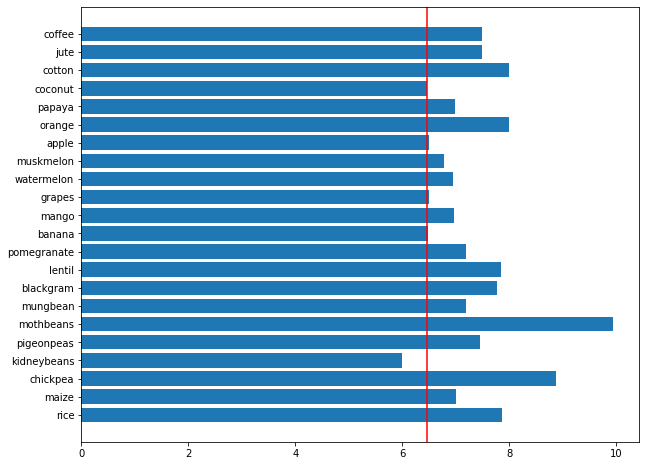

In [107]:
plt.figure(figsize=(10,8))
plt.barh(df['label'],df['ph'])
plt.axvline(df['ph'].mean(),c='r')
plt.show()

### Rainfall

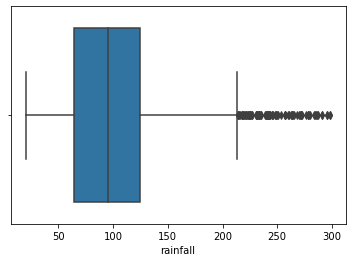

In [108]:
sns.boxplot(df['rainfall'])
plt.show()

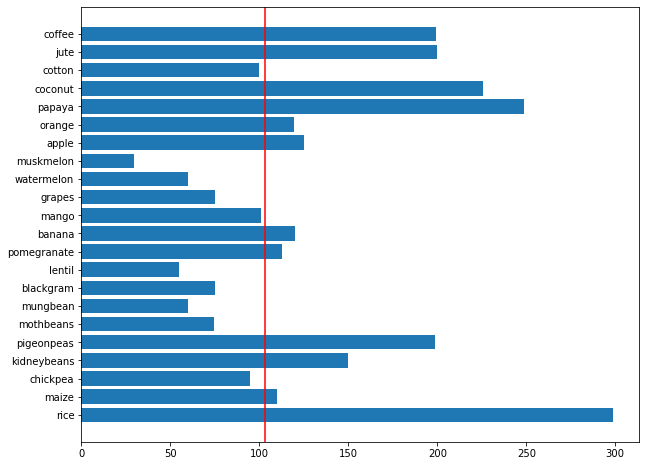

In [109]:
plt.figure(figsize=(10,8))
plt.barh(df['label'],df['rainfall'])
plt.axvline(df['rainfall'].mean(),c='r')
plt.show()

### Soil

In [110]:
df['Soil'].unique()

array(['clayloams', 'clay loams', '\xa0loamy sand to clay loam',
       'deep black soils', 'loamy soil', 'black cotton soils',
       'dry sandy soil', 'red laterite soils',
       'sandy soils to heavy cotton soils', 'Acidic soils\xa0',
       'deep loamy soils', 'rich loamy soil\xa0', 'alluvial',
       'black soils and red loams', 'Sandy loam', 'acidity soil',
       'heavy clay or compact subsoil',
       'Deep well drained loamy soils\xa0', 'sandy loam soil',
       'Red sandy loam', 'Black soil', 'fertile volcanic red soil\xa0'],
      dtype=object)

In [111]:
df['Soil'].nunique()

22

In [112]:
from scipy import stats

In [113]:

ct = pd.crosstab(df['label'],df['Soil'])
test_stat,pval,dof,ex = stats.chi2_contingency(ct)
print('\n')
if pval<=0.05:
    print('Significant variable','Soil','pvalue:',round(pval,2))
else:
    print('insignificant variable','Soil','pvalue:',round(pval,2))



Significant variable Soil pvalue: 0.0


rice


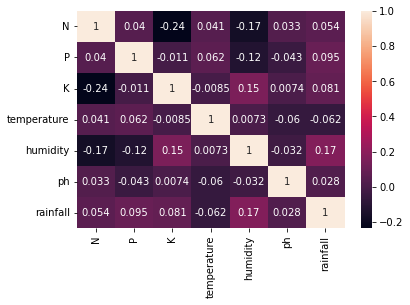

maize


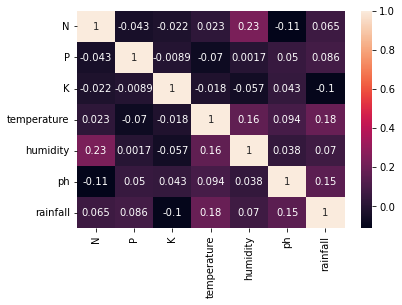

chickpea


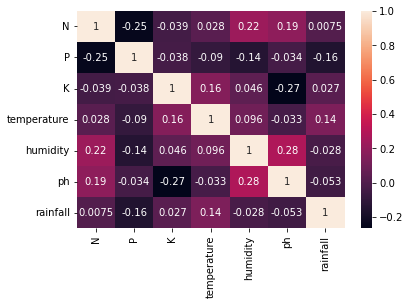

kidneybeans


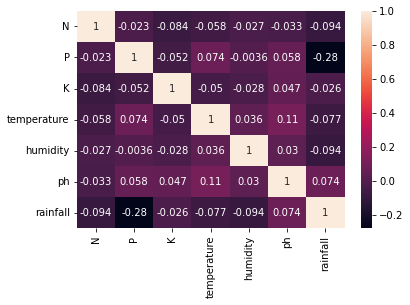

pigeonpeas


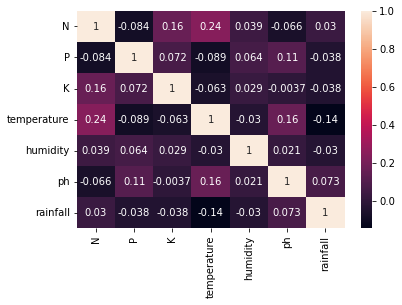

mothbeans


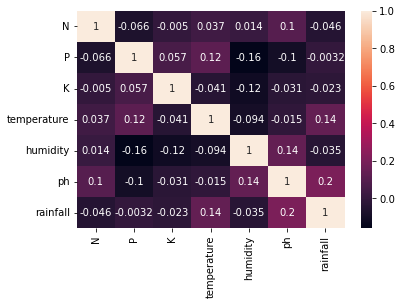

mungbean


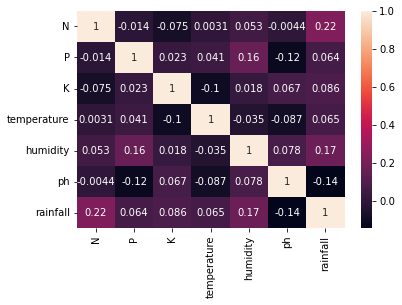

blackgram


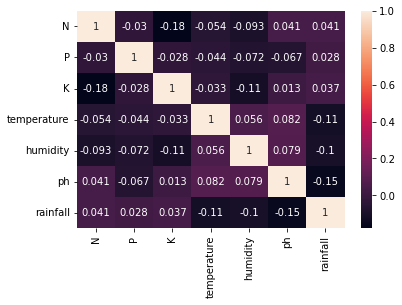

lentil


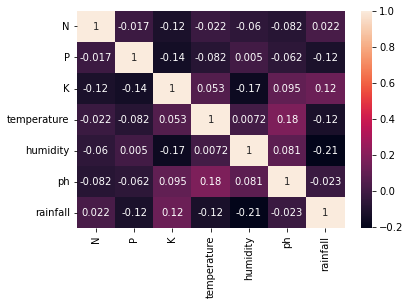

pomegranate


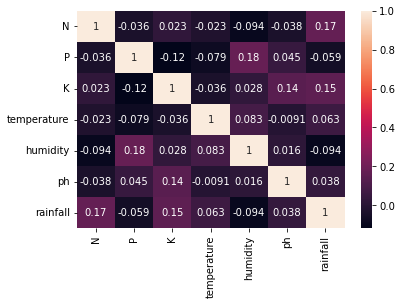

banana


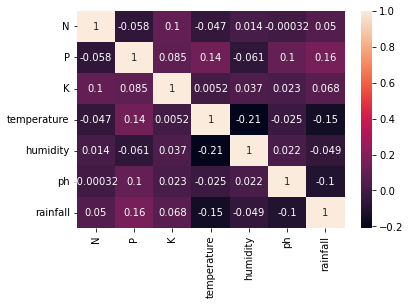

mango


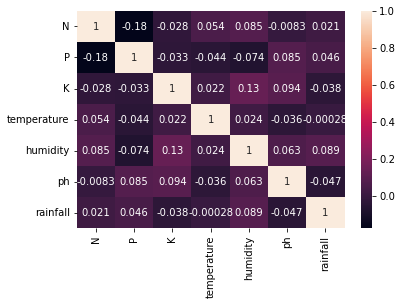

grapes


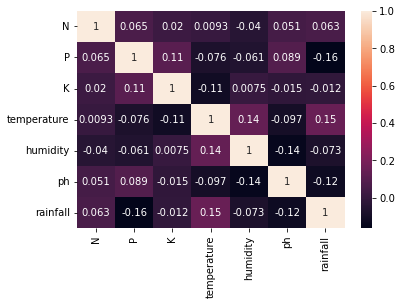

watermelon


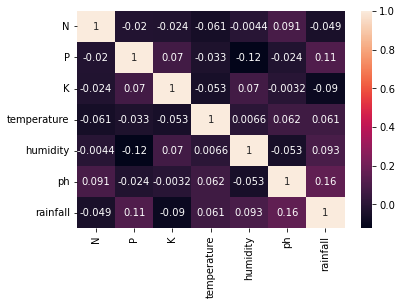

muskmelon


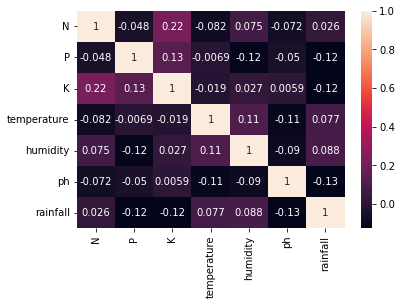

apple


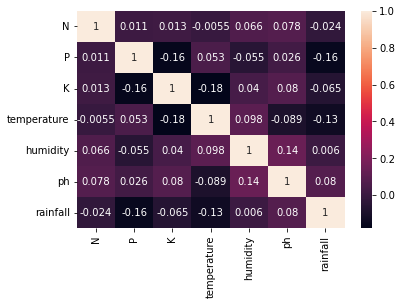

orange


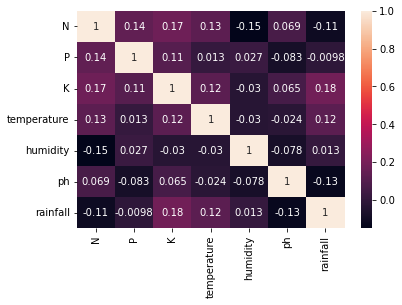

papaya


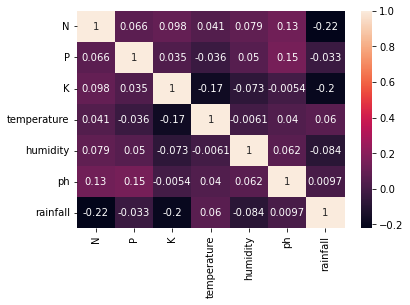

coconut


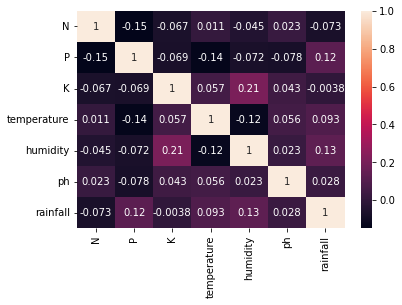

cotton


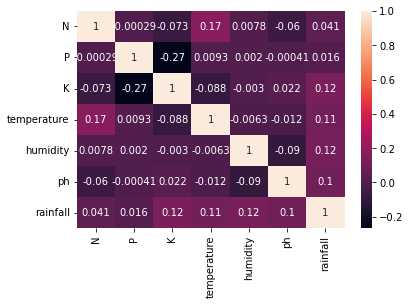

jute


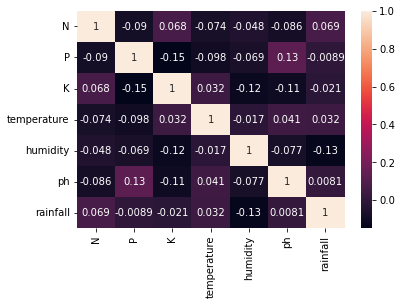

coffee


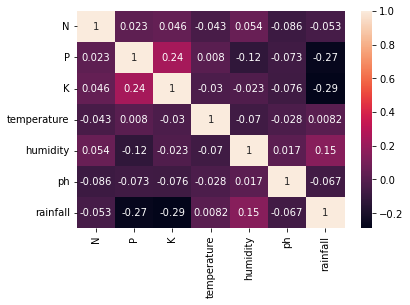

In [114]:
for i in df['label'].unique():
    print(i)
    sns.heatmap(df[df['label']==i].corr(),annot=True)
    plt.show()

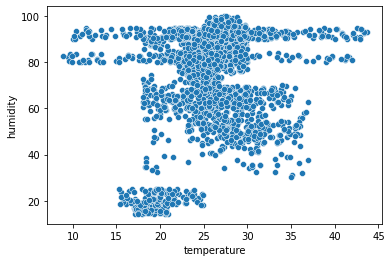

In [115]:
sns.scatterplot(df['temperature'],df['humidity'])
plt.show()

rice


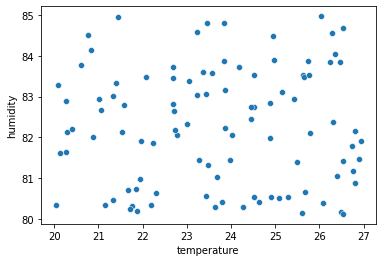

maize


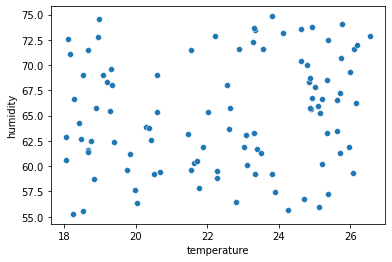

chickpea


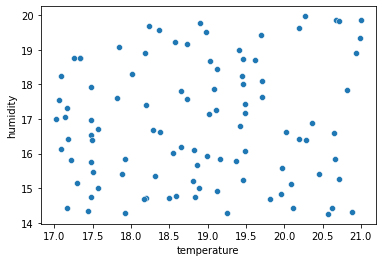

kidneybeans


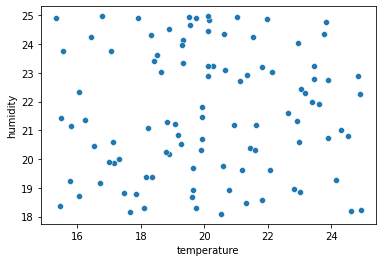

pigeonpeas


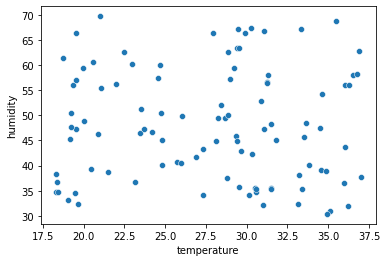

mothbeans


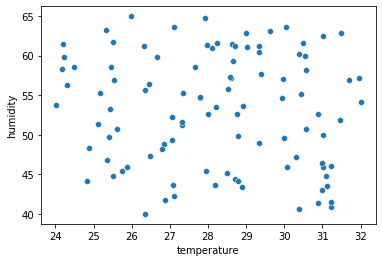

mungbean


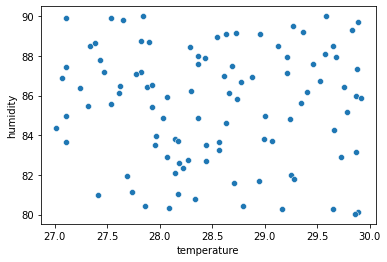

blackgram


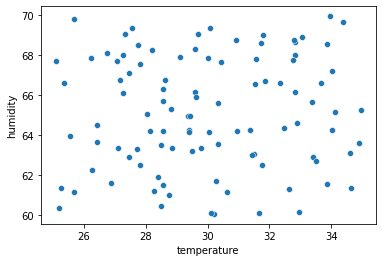

lentil


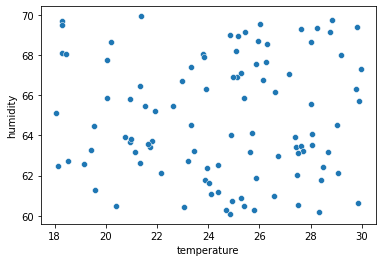

pomegranate


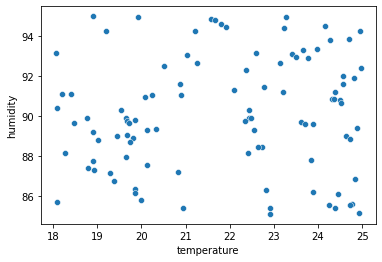

banana


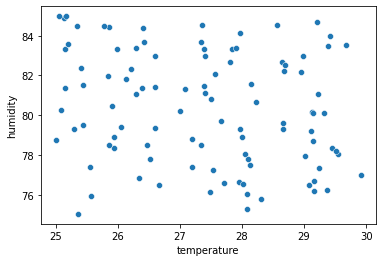

mango


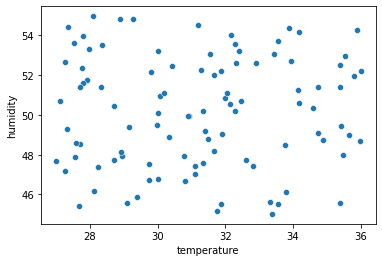

grapes


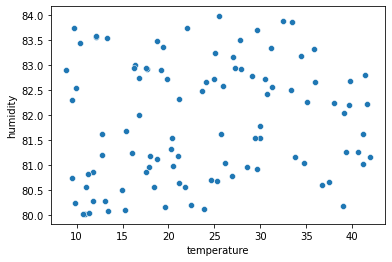

watermelon


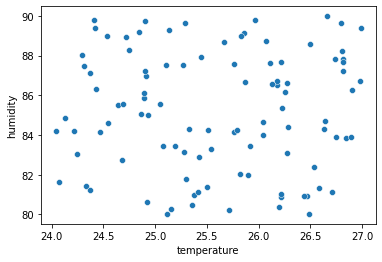

muskmelon


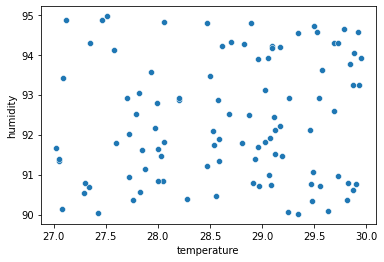

apple


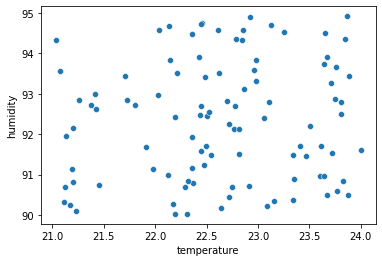

orange


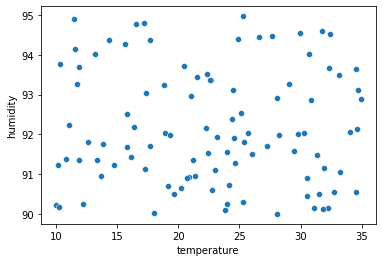

papaya


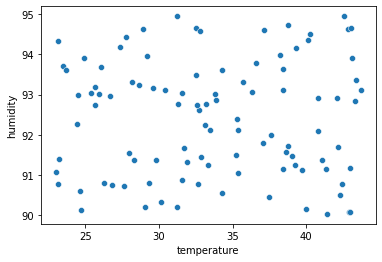

coconut


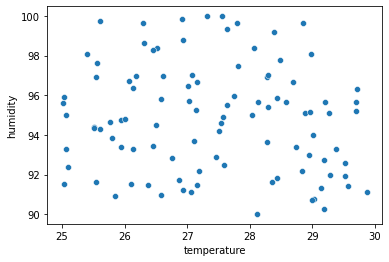

cotton


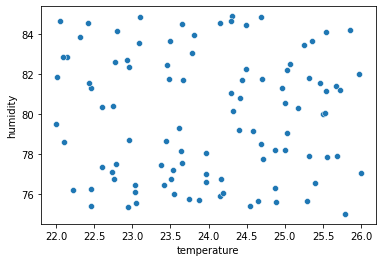

jute


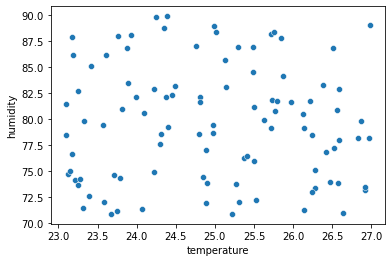

coffee


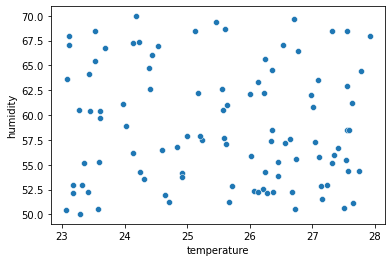

In [116]:
for i in df['label'].unique():
    print(i)
    sns.scatterplot(df[df['label']==i]['temperature'],df[df['label']==i]['humidity'])
    plt.show()

In [117]:
df_num = df.iloc[:,:-2]
df_cat = df.iloc[:,-2:]

In [118]:
df_num.head(2)

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537


In [119]:
df_cat.head(2)

,label,Soil
0,rice,clayloams
1,rice,clay loams


In [120]:
df_num.skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

### Scaling

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
SS = StandardScaler()
scale_data = SS.fit_transform(df_num)
df_scaled = pd.DataFrame(scale_data,columns=df_num.columns)
df_scaled.head()

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373


In [123]:
df_scaled.skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

N


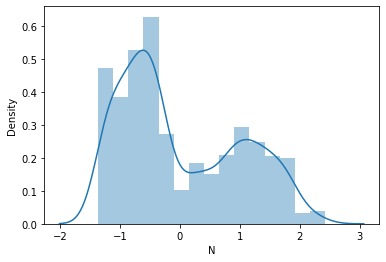

P


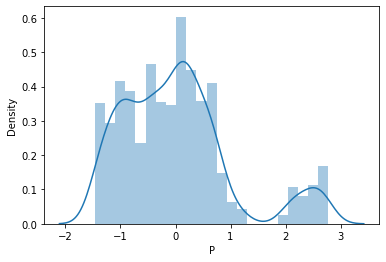

K


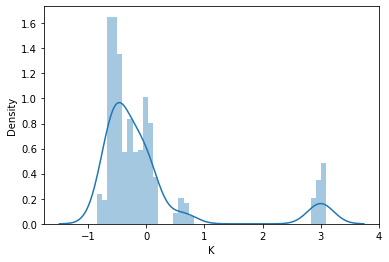

temperature


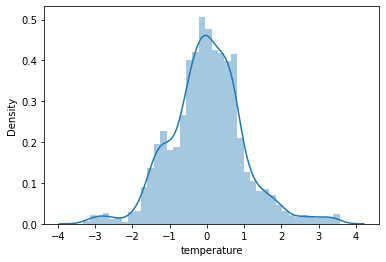

humidity


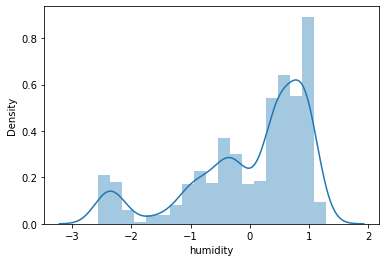

ph


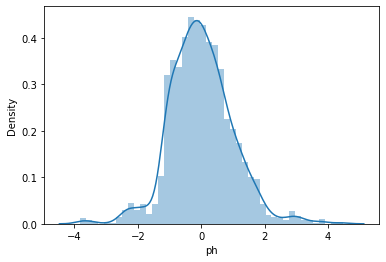

rainfall


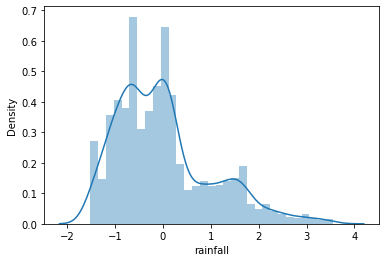

In [124]:
for i in df_scaled.columns:
    print(i)
    sns.distplot(df_scaled[i])
    plt.show()

### Encoding the categorical (Target) variable

In [125]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])
df.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label,Soil,encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,clayloams,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,clay loams,20


### Splitting the data

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X = df_scaled
y = df['encoded_label']

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


### Naive Baye's

In [129]:
from sklearn.naive_bayes import GaussianNB

In [130]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB() #navibaye's
nb.fit(X_train, y_train)       
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
kappa_score_nb = cohen_kappa_score(y_test, y_pred_nb)  
print('accuracy:', round(accuracy_nb, 4))
print('kappa_score:', round(kappa_score_nb, 4))
print('Classification Report:\n', classification_report(y_test, y_pred_nb))


accuracy: 0.9955
kappa_score: 0.9952
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        15
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        17
          16       1

In [131]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Assuming you have your data loaded into X and y

kf = KFold(n_splits=5, shuffle=True, random_state=10)
nb = GaussianNB()  # Assuming you have already defined your Naive Bayes model

score = cross_val_score(estimator=nb, X=X, y=y, scoring='f1_micro', cv=kf, n_jobs=-1)
nb_BE = np.mean(1 - score)
nb_VE = np.std(score)

print('BE:', round(nb_BE, 3))
print('VE:', round(nb_VE, 3))


BE: 0.006
VE: 0.003


### Support Vector Machine

In [132]:
from sklearn.svm import SVC

In [133]:
SVM = SVC()
SVM.fit(X_train,y_train)       
y_pred_svm = SVM.predict(X_test)
accuracy_svm = accuracy_score(y_test,y_pred_svm)
kappa_score_svm = cohen_kappa_score(y_test,y_pred_svm)  
print('accuracy:',round(accuracy_svm,4))
print('kappa_score:',round(kappa_score_svm,4))
print('Classification Report:','\n',classification_report(y_test,y_pred_svm))

accuracy: 0.9909
kappa_score: 0.9905
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        15
           8       0.90      0.95      0.92        19
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        17
          16       

In [134]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Assuming you have your training data loaded into X_train and y_train

params = {'C': [0.1, 1, 10, 100]}
kf = KFold(n_splits=5, shuffle=True, random_state=10)

# Using SVC as the estimator, you can replace it with your desired model
gs = GridSearchCV(SVC(probability=True), params, cv=kf, scoring='f1_micro', n_jobs=-1, verbose=3) 
gs.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='f1_micro',
             verbose=3)

In [135]:
gs.best_params_

{'C': 10}

In [136]:
SVM_tuned = SVC(C=10, kernel='rbf', probability=True)
SVM_tuned.fit(X_train, y_train)       
y_pred_svm_tuned = SVM_tuned.predict(X_test)
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
kappa_score_svm_tuned = cohen_kappa_score(y_test, y_pred_svm_tuned) 
print('accuracy:', round(accuracy_svm_tuned, 4))
print('kappa_score:', round(kappa_score_svm_tuned, 4))
print('Classification Report:\n', classification_report(y_test, y_pred_svm_tuned))


accuracy: 0.9955
kappa_score: 0.9952
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        15
           8       0.95      0.95      0.95        19
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        17
          16       1

In [137]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=SVM_tuned,X=X,y=y,scoring='accuracy',cv=kf,n_jobs=-1)
svm_BE = np.mean(1-score)
svm_VE = np.std(score)

print('BE:',round(svm_BE,3))
print('VE:',round(svm_VE,3))

BE: 0.012
VE: 0.006


### Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)            
y_pred_dt = DT.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
kappa_score_dt = cohen_kappa_score(y_test,y_pred_dt)   
print('accuracy:',round(accuracy_dt,4))
print('kappa_score:',round(kappa_score_dt,4))
print('Classification Report:','\n',classification_report(y_test,y_pred_dt))

accuracy: 0.9955
kappa_score: 0.9952
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        15
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        30
          11       0.96      1.00      0.98        22
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        17
          16       

In [140]:
params = {'max_depth': list(range(10,101,10)), 'min_samples_split':[0.1,0.2,0.4,1,2]}
kf = KFold(n_splits=5,shuffle=True,random_state=10)
gs=GridSearchCV(DT,params,cv=kf,scoring='f1_micro',n_jobs=-1,verbose=3) 
gs.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'min_samples_split': [0.1, 0.2, 0.4, 1, 2]},
             scoring='f1_micro', verbose=3)

In [141]:
gs.best_params_

{'max_depth': 70, 'min_samples_split': 2}

In [142]:
DT_tuned = DecisionTreeClassifier(max_depth= 60, min_samples_split= 2)
DT_tuned.fit(X_train,y_train) # decision Tree        
y_pred_dt_tuned = DT_tuned.predict(X_test)
accuracy_dt_tuned = accuracy_score(y_test,y_pred_dt_tuned)
kappa_score_dt_tuned = cohen_kappa_score(y_test,y_pred_dt_tuned)   
print('accuracy:',round(accuracy_dt_tuned,4))
print('kappa_score:',round(kappa_score_dt_tuned,4))
print('Classification Report:','\n',classification_report(y_test,y_pred_dt_tuned))

accuracy: 0.9864
kappa_score: 0.9857
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      0.96      0.98        27
           7       1.00      1.00      1.00        15
           8       1.00      0.74      0.85        19
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        30
          11       0.96      1.00      0.98        22
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        17
          16       

In [143]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=DT_tuned,X=X,y=y,scoring='f1_micro',cv=kf,n_jobs=-1)
dt_BE = np.mean(1-score)
dt_VE = np.std(score)

print('BE:',round(dt_BE,3))
print('VE:',round(dt_VE,3))

BE: 0.011
VE: 0.005


### Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)            
y_pred_rf = RF.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
kappa_score_rf = cohen_kappa_score(y_test,y_pred_rf)
print('accuracy:',round(accuracy_rf,4))
print('kappa_score:',round(kappa_score_rf,4))
print('Classification Report:','\n',classification_report(y_test,y_pred_rf))

accuracy: 0.9955
kappa_score: 0.9952
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        15
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        17
          16       

In [146]:
params = {'n_estimators': [100,150,200,250,300], 'max_depth': list(range(10,51,10))}
kf = KFold(n_splits=5,shuffle=True,random_state=10)
gs = GridSearchCV(RF,params,cv=kf,scoring='f1_micro',n_jobs=-1,verbose=3) 
gs.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='f1_micro', verbose=3)

In [147]:
gs.best_score_

0.996590909090909

In [148]:
gs.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [149]:
RF_tuned = RandomForestClassifier(max_depth= 30, n_estimators= 250)
RF_tuned.fit(X_train,y_train)            
y_pred_rf_tuned = RF_tuned.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test,y_pred_rf_tuned)
kappa_score_rf_tuned = cohen_kappa_score(y_test,y_pred_rf_tuned)
print('accuracy:',round(accuracy_rf_tuned,4))
print('kappa_score:',round(kappa_score_rf_tuned,4))
print('Classification Report:','\n',classification_report(y_test,y_pred_rf_tuned))

accuracy: 0.9955
kappa_score: 0.9952
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        15
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        17
          16       

In [150]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=RF_tuned,X=X,y=y,scoring='f1_micro',cv=kf,n_jobs=-1)
rf_BE = np.mean(1-score)
rf_VE = np.std(score)

print('BE:',round(rf_BE,3))
print('VE:',round(rf_VE,3))

BE: 0.005
VE: 0.002


In [151]:
model = ['Naive_Bayes','SVM','Decision_tree','Random_forest']
Accuracy = [0.9955,0.9955,0.9864,0.9955]
Kappa_score = [0.9952,0.9952,0.9857,0.9952]
bias_error = [0.006,0.012,0.01,0.005]
variance_error = [0.003,0.006,0.004,0.002]

In [152]:
df_metrics = pd.DataFrame(columns=['Model','Accuracy','Kappa_score','Bias_error','Variance_error'])
df_metrics['Model'] = model
df_metrics['Accuracy'] = Accuracy
df_metrics['Kappa_score'] = Kappa_score
df_metrics['Bias_error'] = bias_error
df_metrics['Variance_error'] = variance_error

In [153]:
df_metrics

,Model,Accuracy,Kappa_score,Bias_error,Variance_error
0,Naive_Bayes,0.9955,0.9952,0.006,0.003
1,SVM,0.9955,0.9952,0.012,0.006
2,Decision_tree,0.9864,0.9857,0.010,0.004
3,Random_forest,0.9955,0.9952,0.005,0.002


By comparing all the metrics and the bias-variance errors, Random Forest is the best model

In [154]:
feat_imp = pd.DataFrame(RF_tuned.feature_importances_,index=X.columns,columns=['Coefs'])
feat_imp.sort_values(by='Coefs',ascending=False).head(20)

,Coefs
rainfall,0.220540
humidity,0.215204
K,0.185561
P,0.148150
N,0.100029
temperature,0.073318
ph,0.057199


Model: GaussianNB()


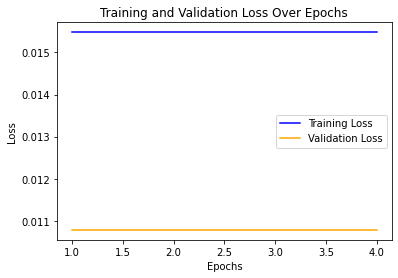

Model: DecisionTreeClassifier(max_depth=60)


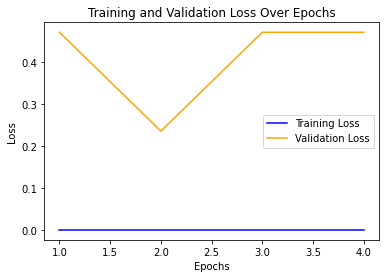

Model: RandomForestClassifier(max_depth=30, n_estimators=250)


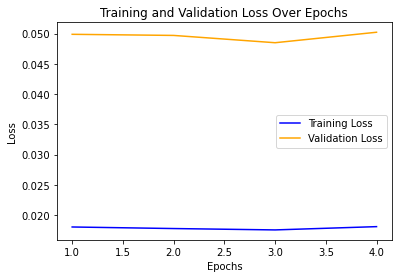

Model: SVC(C=10, probability=True)


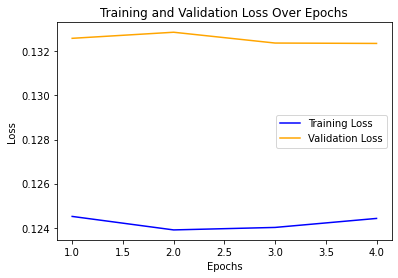

In [155]:
from sklearn.metrics import log_loss
model_list = [nb, DT_tuned, RF_tuned, SVM_tuned]

for model in model_list:
    print('Model:', model)
    epochs = 4

    # Lists to store loss values
    train_losses = []
    validation_losses = []

    # Training loop
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(X_train))
        X_train_shuffled, y_train_shuffled = X_train.iloc[indices], y_train.iloc[indices]

        # Train the model
        model.fit(X_train_shuffled, y_train_shuffled)

        # Calculate log loss on the training set
        train_preds = model.predict_proba(X_train_shuffled)
        train_loss = log_loss(y_train_shuffled, train_preds)
        train_losses.append(train_loss)

        # Calculate log loss on the validation set
        validation_preds = model.predict_proba(X_test)
        validation_loss = log_loss(y_test, validation_preds)
        validation_losses.append(validation_loss)

    # Plotting
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, epochs + 1), validation_losses, label='Validation Loss', color='orange')

    # Adding labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')

    # Adding a legend
    plt.legend()

    # Display the plot
    plt.show()

Model: GaussianNB()


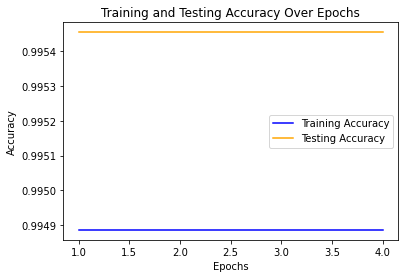

Model: DecisionTreeClassifier(max_depth=60)


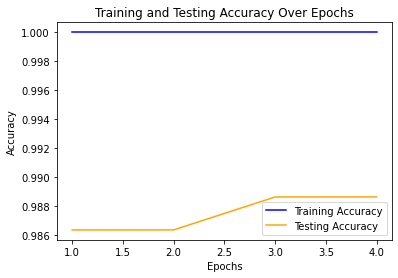

Model: RandomForestClassifier(max_depth=30, n_estimators=250)


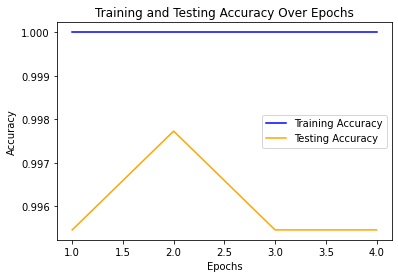

Model: SVC(C=10, probability=True)


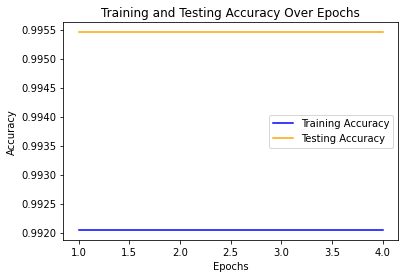

In [156]:
for model in model_list:    
    print('Model:',model)
    epochs = 4

    # Lists to store accuracy values
    train_accuracies = []
    test_accuracies = []

    # Training loop
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(X_train))
        X_train_shuffled, y_train_shuffled = X_train.iloc[indices], y_train.iloc[indices]

        # Train the model
        model.fit(X_train_shuffled, y_train_shuffled)

        # Calculate accuracy on the training set
        train_preds = model.predict(X_train_shuffled)
        train_accuracy = accuracy_score(y_train_shuffled, train_preds)
        train_accuracies.append(train_accuracy)

        # Calculate accuracy on the testing set
        test_preds = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_preds)
        test_accuracies.append(test_accuracy)

    # Plotting
    plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(range(1, epochs + 1), test_accuracies, label='Testing Accuracy', color='orange')

    # Adding labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy Over Epochs')

    # Adding a legend
    plt.legend()

    # Display the plot
    plt.show()

In [159]:
import joblib
RF=RandomForestClassifier(max_depth=100,random_state=0)
RF.fit(X_train,y_train)   
# Save the model
joblib.dump(RF, "model.joblib")

# Load the model
model = joblib.load("model.joblib")
print("Model Saved")

# Initialize empty lists to store training and validation accuracy and loss values
train_acc = []
val_acc = []
train_loss = []
val_loss = []

# Train the model and keep track of training and validation accuracy and loss
'''for epoch in range(10):
    RF.fit(X_train, y_train)
    train_predictions = RF.predict(X_train)
    train_acc.append(RF.score(X_train, y_train))
    train_loss.append(mean_squared_error(y_train, train_predictions))
    val_predictions = RF.predict(X_test)
    val_acc.append(RF.score(X_test, y_test))
    val_loss.append(mean_squared_error(y_test, val_predictions))'''

# Load the dataset
dataset = pd.read_csv("C:/Users/Dell/Desktop/Croprediction Capstone/Croprediction Capstone/Crop_recommendation.csv", encoding='ISO-8859-1')

# Encode the 'label' column using LabelEncoder
le = LabelEncoder()

y = le.fit_transform(dataset['label'])
print(y)

# Preprocess the data
X = dataset.drop(['label', 'Soil'], axis=1)
print(y,X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RF= joblib.load("model.joblib")
X_test = np.array([[85,38,41,21.58,82.78,6.24,276.65]])

# Make predictions using the loaded model
predictions = RF.predict(X_test)
print(predictions)
# Convert the predictions to integers
predicted_labels = le.inverse_transform(predictions.astype(int))

# Print the predicted crop labels
print("Predicted Crop Labels:")
print(predicted_labels[0])

Model Saved
[20 20 20 ...  5  5  5]
[20 20 20 ...  5  5  5]         N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
[20]
Predicted Crop Labels:
rice


In [1]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the model
RF = joblib.load("model.joblib")

# Load the dataset
dataset = pd.read_csv("C:/Users/Dell/Desktop/Croprediction Capstone/Croprediction Capstone/Crop_recommendation.csv", encoding='ISO-8859-1')

# Encode the 'label' column using LabelEncoder
le = LabelEncoder()

y = le.fit_transform(dataset['label'])

# Preprocess the data
X = dataset.drop(['label','Soil'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# input values for X_test
user_input = []
print("Enter values for the features in X_test:")
for i in range(7):
    value = float(input(f"Value {i+1}: "))
    user_input.append(value)
# Convert the user input to a NumPy array
X_test = np.array([user_input])

# Make predictions using the loaded model
predictions = RF.predict(X_test)

# Convert the predictions to integers
predicted_labels = le.inverse_transform(predictions.astype(int))

# Print the predicted crop labels
print("Predicted Crop Labels:")
print(predicted_labels[0])

Enter values for the features in X_test:
Value 1: 27
Value 2: 74
Value 3: 20
Value 4: 24.69
Value 5: 59.96
Value 6: 5.85
Value 7: 91.95
Predicted Crop Labels:
pigeonpeas


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
